# Test vmap and differentiation

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (6, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


In [2]:
from jax import make_jaxpr
import jax.numpy as jnp
import numpy as np
from jax import grad, jit, vmap,jacobian,jacfwd

In [3]:
def func(x,y):
    return jnp.exp(-x**2-3*y**2)

In [4]:
x = jnp.linspace(-2,2,50)
y = jnp.linspace(-2,2,50)

I0000 00:00:1698352917.174512       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


In [5]:
xx,yy = jnp.meshgrid(x,y)

In [6]:
func_array = func(xx,yy)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


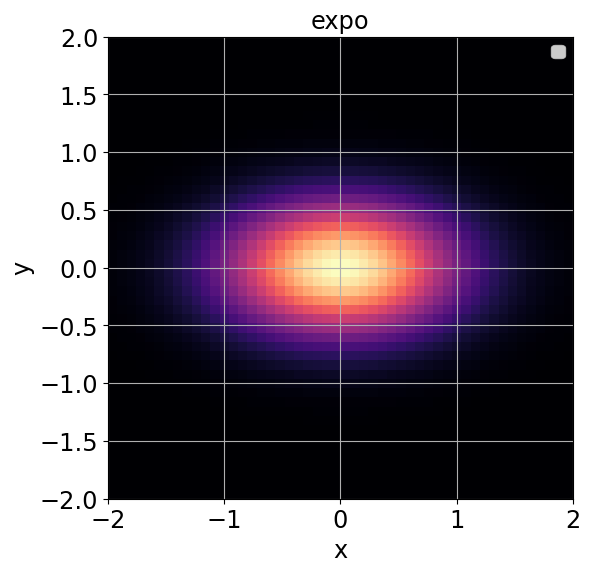

In [7]:
fig, ax = plt.subplots()
ax.imshow(func_array,origin="lower",cmap=plt.cm.magma,extent=(x.min(),x.max(),y.min(),y.max()),aspect='auto')
title = f"expo"
ax.set_title(title)
ax.set_xlabel("x")
ax.set_ylabel("y")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

In [8]:
grad_x = grad(func,argnums=0)
grad_y = grad(func,argnums=1)

In [9]:
func_grad_x = vmap( vmap(grad_x,in_axes=(0, None) ), in_axes=(None,0) )
#func_grad_x = vmap( vmap(grad_x,in_axes=(None,0) ), in_axes=(0,None) )
#func_grad_y = vmap( vmap(grad_y,in_axes=(None, 0) ), in_axes=(0, None) )
func_grad_y = vmap( vmap(grad_y,in_axes=(0, None) ), in_axes=(None,0) )

In [10]:
func_grad_x_array =  func_grad_x(x,y) 
func_grad_y_array =  func_grad_y(x,y) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


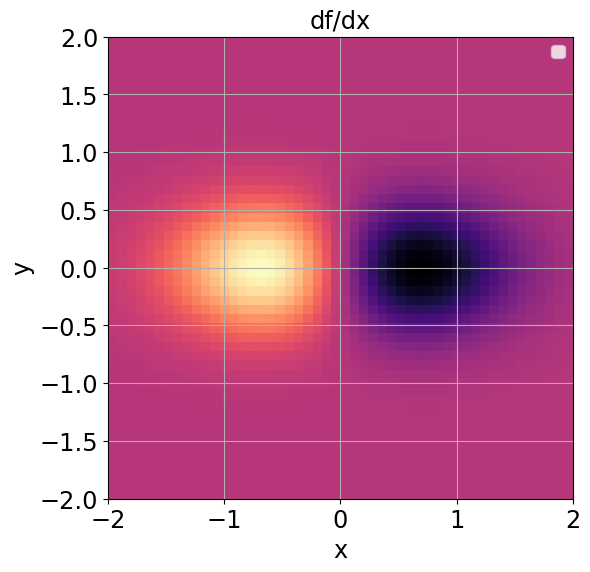

In [11]:
fig, ax = plt.subplots()
ax.imshow(func_grad_x_array,origin="lower",cmap=plt.cm.magma,extent=(x.min(),x.max(),y.min(),y.max()),aspect='auto')
title = f"df/dx"
ax.set_title(title)
ax.set_xlabel("x")
ax.set_ylabel("y")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'y')

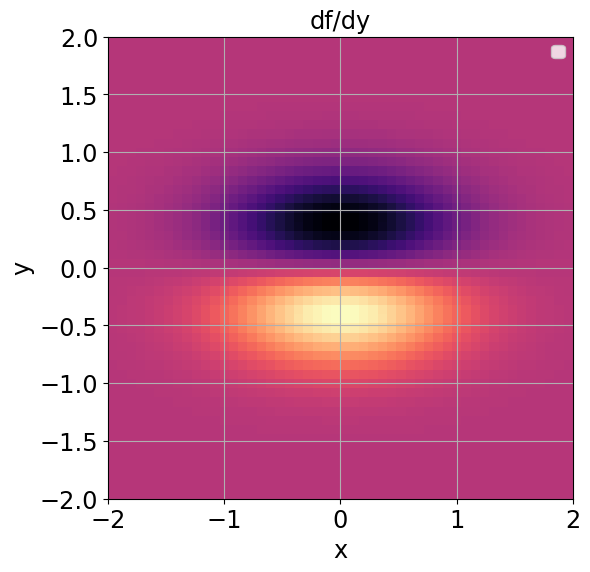

In [12]:
fig, ax = plt.subplots()
ax.imshow(func_grad_y_array,origin="lower",cmap=plt.cm.magma,extent=(x.min(),x.max(),y.min(),y.max()),aspect='auto')
title = f"df/dy"
ax.set_title(title)
ax.set_xlabel("x")
ax.set_ylabel("y")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")

In [13]:
grad_xx = grad(grad_x,argnums=0)
grad_yy = grad(grad_y,argnums=1)
grad_xy = grad(grad_x,argnums=1)
grad_yx = grad(grad_y,argnums=0)

In [14]:
func_grad_xx = vmap( vmap(grad_xx,in_axes=(0, None) ), in_axes=(None,0) )
func_grad_yy = vmap( vmap(grad_yy,in_axes=(0, None) ), in_axes=(None,0) )
func_grad_xy = vmap( vmap(grad_xy,in_axes=(0, None) ), in_axes=(None,0) )
func_grad_yx = vmap( vmap(grad_yx,in_axes=(0, None) ), in_axes=(None,0) )

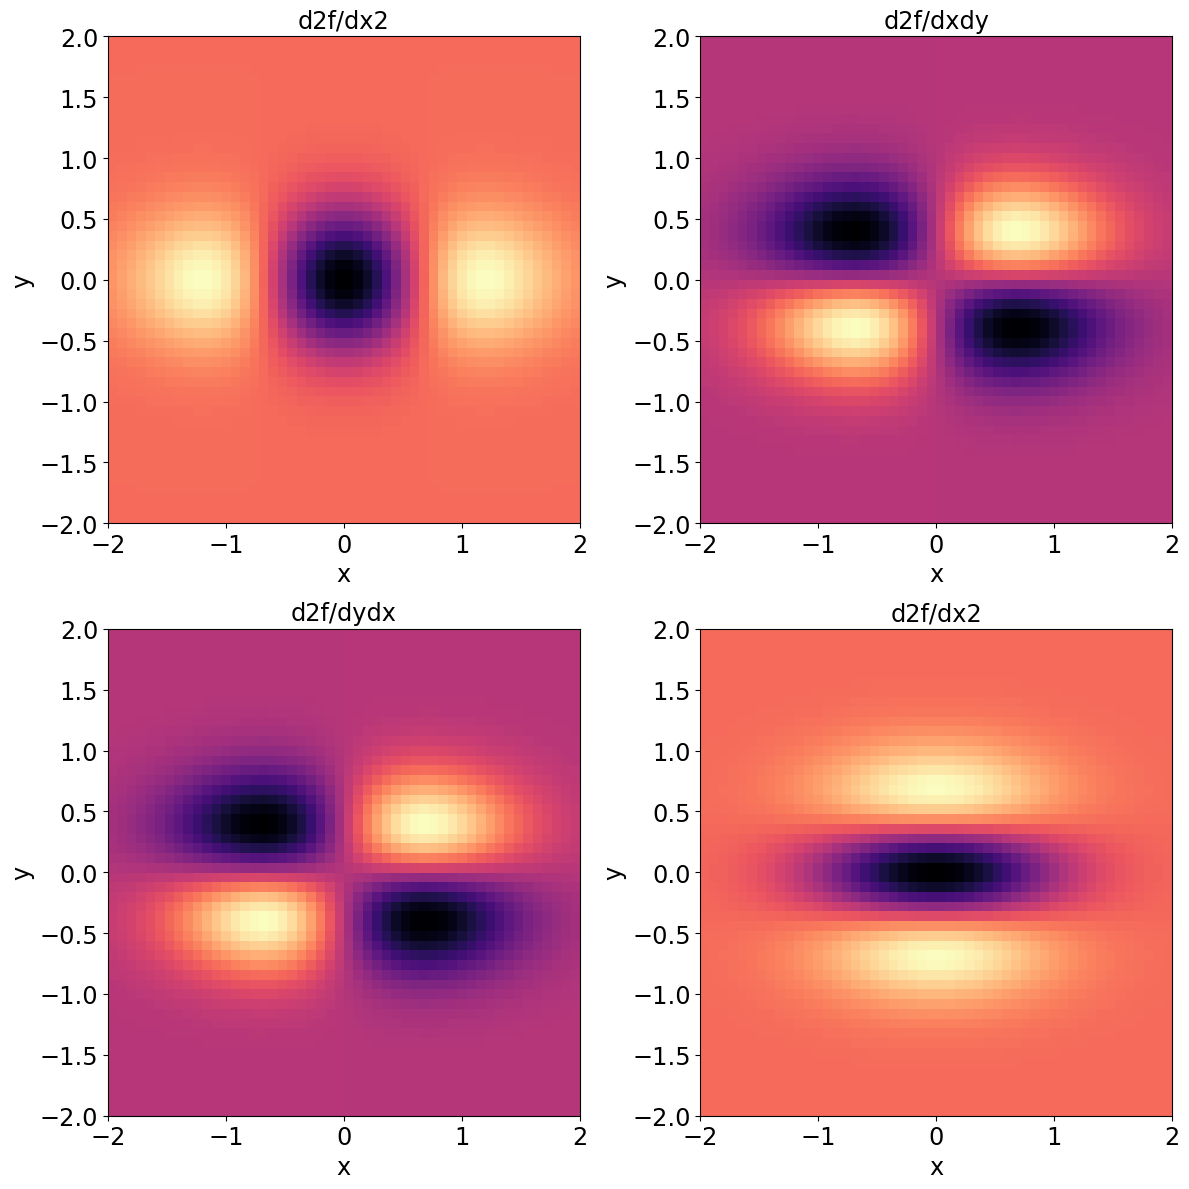

In [15]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
flatten_axes = axes.flatten()
titles = ["d2f/dx2", "d2f/dxdy", "d2f/dydx","d2f/dx2"]
for idx, ax in enumerate(flatten_axes):
    
    if idx == 0:
        array = func_grad_xx(x,y)
    elif idx == 1:
        array = func_grad_xy(x,y)
    elif idx == 2:
        array = func_grad_yx(x,y)
    elif idx == 3:
        array = func_grad_yy(x,y)
        
    ax.imshow(array,origin="lower",cmap=plt.cm.magma,extent=(x.min(),x.max(),y.min(),y.max()),aspect='auto')
    ax.set_title(titles[idx])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
plt.tight_layout()    